In [1]:
import pandas as pd
import datetime as dt


In [2]:
dataset=pd.read_csv("Quality data Preprocessed data.csv")

In [3]:
dataset

,Product,Time,Equipment,Char A,Char B,Char C,Char D,Char E,Char A6,Char A7,Char A8,Char A9,Char A10,Class
0,Product-1,2022-09-05,B1,82,17,12,126,119,B,C,A,H,H,H
1,Product-2,2022-09-05,B1,96,13,13,72,42,B,B,A,B,B,B
2,Product-3,2022-09-05,B1,60,12,13,56,33,B,B,A,B,B,B
3,Product-4,2022-09-05,B1,53,12,11,45,21,B,B,A,B,A,B
4,Product-5,2022-09-05,B1,56,12,17,49,26,B,B,B,B,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,Product-5640,2023-04-20,B1,84,3,14,63,61,B,A,B,B,C,C
5640,Product-5641,2023-04-20,B4,52,2,12,42,20,B,A,A,B,A,B
5641,Product-5642,2023-04-20,B4,56,2,9,66,39,B,A,A,B,B,B
5642,Product-5643,2023-04-20,B1,51,3,13,67,43,B,A,A,B,B,B


In [4]:
dataset.columns

Index(['Product', 'Time', 'Equipment', 'Char A', 'Char B', 'Char C', 'Char D',
       'Char E', 'Char A6', 'Char A7', 'Char A8', 'Char A9', 'Char A10',
       'Class'],
      dtype='object')

In [5]:
startdate="2015-09-05"
enddate="2023-04-20"
df=dataset[dataset['Time'].between(startdate,enddate)][['Time', 'Char A','Char B','Char C','Char D','Char E']]

In [6]:
df

,Time,Char A,Char B,Char C,Char D,Char E
0,2022-09-05,82,17,12,126,119
1,2022-09-05,96,13,13,72,42
2,2022-09-05,60,12,13,56,33
3,2022-09-05,53,12,11,45,21
4,2022-09-05,56,12,17,49,26
...,...,...,...,...,...,...
5639,2023-04-20,84,3,14,63,61
5640,2023-04-20,52,2,12,42,20
5641,2023-04-20,56,2,9,66,39
5642,2023-04-20,51,3,13,67,43


In [7]:
df=df[['Char A', 'Char B', 'Char C', 'Char D','Char E']]

In [8]:
df.head()

,Char A,Char B,Char C,Char D,Char E
0,82,17,12,126,119
1,96,13,13,72,42
2,60,12,13,56,33
3,53,12,11,45,21
4,56,12,17,49,26


In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(df)
print("Len:",data1.shape)

Len: (5644, 5)


In [10]:
len(data1)

5644

In [11]:
data1=pd.DataFrame(data1,columns=['Char A', 'Char B', 'Char C', 'Char D','Char E'])

In [12]:
training_size=round(len(data1)*0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

4515
X_train length: (4515, 5)
X_test length: (1129, 5)
y_train length: (4515, 5)
y_test length: (1129, 5)


In [13]:
Quality={'Model':[],'Char A':[],'Char B':[],'Char C':[],'Char D':[],'Char E':[]}

In [14]:
data1

,Char A,Char B,Char C,Char D,Char E
0,0.473684,0.81250,0.242424,0.771429,0.880597
1,0.555556,0.68750,0.272727,0.385714,0.305970
2,0.345029,0.65625,0.272727,0.271429,0.238806
3,0.304094,0.65625,0.212121,0.192857,0.149254
4,0.321637,0.65625,0.393939,0.221429,0.186567
...,...,...,...,...,...
5639,0.485380,0.37500,0.303030,0.321429,0.447761
5640,0.298246,0.34375,0.242424,0.171429,0.141791
5641,0.321637,0.34375,0.151515,0.342857,0.283582
5642,0.292398,0.37500,0.272727,0.350000,0.313433


In [15]:
listt=['Char A', 'Char B', 'Char C', 'Char D','Char E']

In [17]:
datasetTwo=df[listt]
test_obs = 28
train =datasetTwo[:-test_obs]
test = datasetTwo[-test_obs:]
from statsmodels.tsa.api import VAR
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()
x = model.select_order(maxlags=12)
order=x.selected_orders["aic"]
result = model.fit(order)

Order = 1
AIC:  21.718260383901935
BIC:  21.75370043840152

Order = 2
AIC:  21.508477472246387
BIC:  21.573460734025993

Order = 3
AIC:  21.41257490767942
BIC:  21.50711031640833

Order = 4
AIC:  21.348903959383307
BIC:  21.473000459085434

Order = 5
AIC:  21.32229349894312
BIC:  21.475960037999908

Order = 6
AIC:  21.29978516925267
BIC:  21.483030700405983

Order = 7
AIC:  21.28327097606474
BIC:  21.496104456419793

Order = 8
AIC:  21.273940739344585
BIC:  21.516371130372843

Order = 9
AIC:  21.266120306855775
BIC:  21.538156574397856

Order = 10
AIC:  21.25753806718996
BIC:  21.559189181458564



In [18]:
#forecast =result.forecast(result,steps=12)

AttributeError: 'VARResults' object has no attribute 'shape'

In [ ]:
data1.columns

TypeError: float() argument must be a string or a real number, not 'VARResultsWrapper'

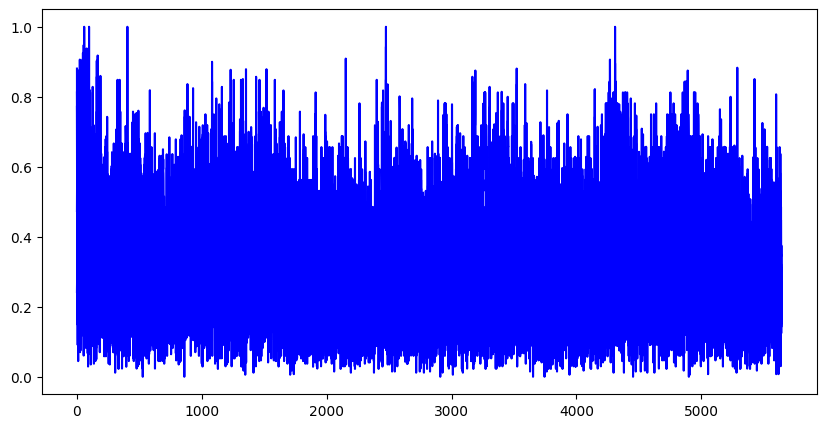

In [23]:
from stockFunctions import graph
graph(data1,result,"Actual","Predicted","Quality data","Time",'Char A')